## Importing the necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing 

In [70]:
#Loading the csv data to a pandas DataFrame
gold_data = pd.read_csv("gold_data.csv")


In [71]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [72]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [73]:
gold_data.shape

(2290, 6)

In [74]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [75]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [76]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Finding Correlation

In [78]:
correlation = gold_data.corr()

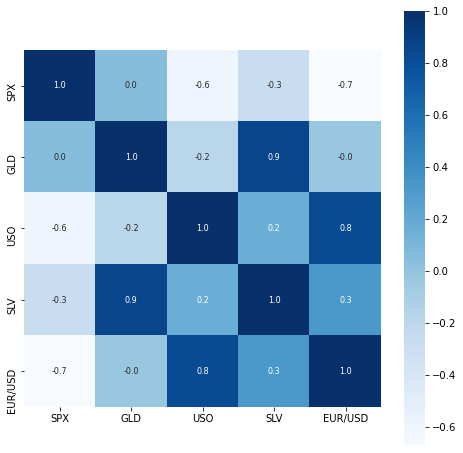

In [79]:
#constructing a heatmap to understand the correlatiion 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues');

In [80]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


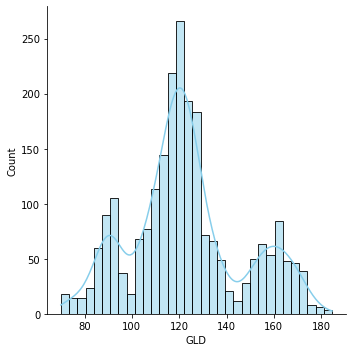

In [81]:
sns.displot(gold_data['GLD'], color = 'skyblue', kde = True);

In [82]:
#spliting the feature and targets
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']


In [83]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [84]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [85]:
#spliting into train and training data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2)

In [86]:
#model training 
regressor = RandomForestRegressor(n_estimators = 100)

In [87]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model Evaluation 

In [88]:
test_data_prediction = regressor.predict(X_test)

In [89]:
test_data_prediction 

array([168.54039963,  81.72809999, 116.14530049, 127.68030065,
       120.71340123, 154.62839767, 150.40879894, 126.14450056,
       117.63259878, 125.88660079, 116.8466008 , 172.49290086,
       140.87229833, 167.68849866, 115.16080022, 117.4441007 ,
       139.22820265, 169.79259976, 159.79540304, 157.58549961,
       155.2281002 , 125.33120031, 175.08120004, 156.82290436,
       125.22070047,  94.0737996 ,  77.66270002, 120.50199997,
       119.08029917, 167.42330003,  88.17090066, 125.39270013,
        91.15790105, 117.88590032, 121.04949937, 136.76950082,
       115.4228017 , 115.29960124, 148.35150024, 107.28360079,
       104.45260239,  87.29419793, 126.46430052, 118.00959988,
       153.00349947, 119.53420016, 108.32420012, 108.26989852,
        93.17700013, 127.13359779,  74.9233002 , 113.65369886,
       121.41059984, 111.10959975, 118.82049868, 120.76639929,
       160.08100055, 167.52550078, 147.13549729,  85.73909868,
        94.31490042,  86.73789893,  90.70970056, 119.03

In [90]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [91]:
error_score

0.9890175228603435

## Comparing the Actual values and Predicted values in a plot

In [92]:
Y_test = list(Y_test)

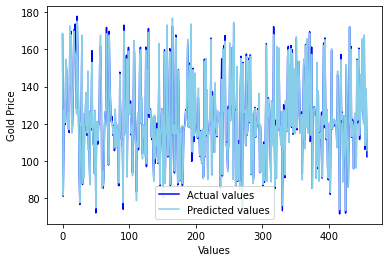

In [93]:
plt.plot(Y_test, color = 'blue', label = 'Actual values')
plt.plot(test_data_prediction, color = 'skyBlue', label = 'Predicted values')
plt.title = ('Prediction vs Actual Values')
plt.xlabel('Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()